<H1>This is sample project for Machine Learing. 
Dataset used is Airlines Satisfaction Survey. </H1>

In [1]:
import random
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np
import seaborn

%matplotlib inline

In [18]:
df_survey=pd.read_csv("../data/SatisfactionSurvey.csv")
df_survey.head()

,Satisfaction,Airline Status,Age,Age Range,Gender,Price Sensitivity,Year of First Flight,No of Flights p.a.,No of Flights p.a. grouped,% of Flight with other Airlines,...,Origin State,Destination City,Destination State,Scheduled Departure Hour,Departure Delay in Minutes,Arrival Delay in Minutes,Flight cancelled,Flight time in minutes,Flight Distance,Arrival Delay greater 5 Mins
0,4.5,Blue,31,30-39,Male,1,2007,28,21 to 30,7,...,Wisconsin,"Dallas/Fort Worth, TX",Texas,15,0.0,3.0,No,134.0,821,no
1,4.0,Blue,56,50-59,Male,2,2006,41,41 to 50,3,...,Wisconsin,"Dallas/Fort Worth, TX",Texas,11,2.0,5.0,No,120.0,821,no
2,2.5,Blue,21,20-29,Female,2,2006,8,1 to 10,7,...,Wisconsin,"Dallas/Fort Worth, TX",Texas,12,34.0,14.0,No,122.0,853,yes
3,4.0,Blue,43,40-49,Male,1,2007,9,1 to 10,9,...,Wisconsin,"Dallas/Fort Worth, TX",Texas,11,26.0,39.0,No,141.0,821,yes
4,5.0,Silver,49,40-49,Male,1,2006,14,11 to 20,10,...,Wisconsin,"Dallas/Fort Worth, TX",Texas,12,0.0,0.0,No,144.0,853,no


In [10]:
#Column Name with Data Type
cols=df_survey.columns
newcols=[col.replace(" ","_") for col in cols]
newcols=[col.replace(".","_") for col in newcols]
df_survey.columns=newcols


datatype=df_survey.dtypes
info_array=zip(newcols,datatype)
for col,dtype in info_array:
    print(col,":",dtype)




Satisfaction : float64
Airline_Status : object
Age : int64
Age_Range : object
Gender : object
Price_Sensitivity : int64
Year_of_First_Flight : int64
No_of_Flights_p_a_ : int64
No_of_Flights_p_a__grouped : object
%_of_Flight_with_other_Airlines : int64
Type_of_Travel : object
No__of_other_Loyalty_Cards : int64
Shopping_Amount_at_Airport : int64
Eating_and_Drinking_at_Airport : int64
Class : object
Day_of_Month : int64
Flight_date : object
Airline_Code : object
Airline_Name : object
Orgin_City : object
Origin_State : object
Destination_City : object
Destination_State : object
Scheduled_Departure_Hour : int64
Departure_Delay_in_Minutes : float64
Arrival_Delay_in_Minutes : float64
Flight_cancelled : object
Flight_time_in_minutes : float64
Flight_Distance : int64
Arrival_Delay_greater_5_Mins : object


<H2> Univariate Analysis </H2>

In [58]:
# Analysis for Date Range
df_datewise=df_survey.sort_values(by="Flight_date")
df_datewise.reset_index()
print("Date Range of Flights Analysed : %s - %s" % (df_datewise.ix[1,"Flight_date"],df_datewise.ix[len(df_datewise)-1,'Flight_date']))

Date Range of Flights Analysed : 01/11/14 - 02/04/14


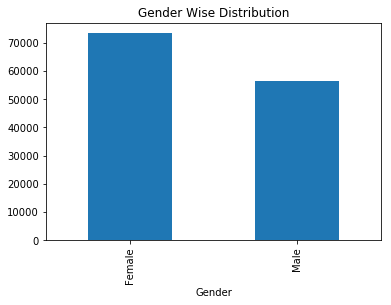

In [59]:
# Analysis Gender Wise
groupby_gender=df_survey.groupby(by="Gender").size()
groupby_gender.plot.bar(title="Gender Wise Distribution")

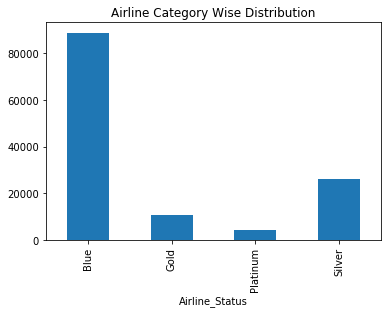

In [60]:
# Analysis Airline Category Wise
groupby_categroy=df_survey.groupby(by="Airline_Status").size()
groupby_categroy.plot.bar(title="Airline Category Wise Distribution")

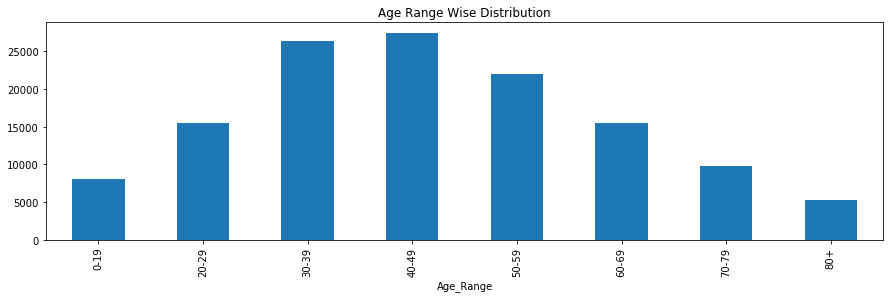

In [61]:
# Analysis Age Range Wise
groupby_age_range=df_survey.groupby(by="Age_Range").size()
groupby_age_range.plot.bar(title="Age Range Wise Distribution",figsize=(15,4))

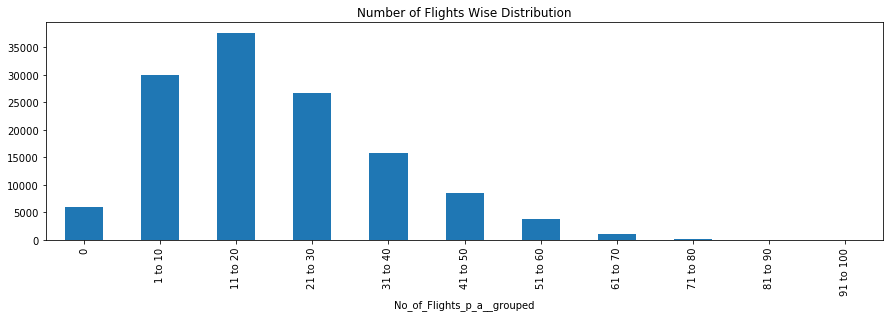

In [63]:


# Analysis Flight Frequency Wise
groupby_flights=df_survey.groupby(by="No_of_Flights_p_a__grouped").size()
groupby_flights.plot.bar(title="Number of Flights Wise Distribution",figsize=(15,4))

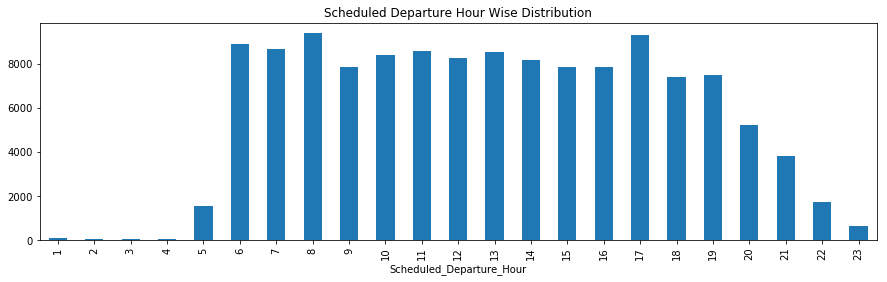

In [64]:


# Analysis Scheduled Departure Hour Wise
groupby_dep_hour=df_survey.groupby(by="Scheduled_Departure_Hour").size()
groupby_dep_hour.plot.bar(title="Scheduled Departure Hour Wise Distribution",figsize=(15,4))

<H2> Multivariate Analysis </H2>

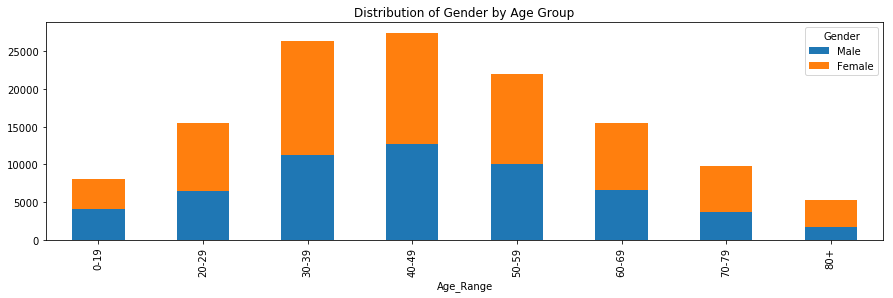

In [71]:
#Analysis Age Group by Gender Type

#We at first transformed the data frame by unstacking, that is, splitting, the gender column into two columns, that is, Male, Female. 
#This meant that for each of the Age Group  we had the flight count for both gender types. Finally, a stacked bar graph was created by using this transformed data frame.
groupby_agegroup_gender=df_survey.groupby(["Age_Range","Gender"])['Age_Range'].count().unstack('Gender').fillna(0)
groupby_agegroup_gender[['Male','Female']].plot.bar(title="Distribution of Gender by Age Group",stacked=True,figsize=(15,4))

<H2> Time Series Analysis </H2>

In [73]:
df_survey['Flight_date'].head(10)

0    03-18-2014
1      01/11/14
2    01-25-2014
3    02-20-2014
4    02-25-2014
5    01-16-2014
6      03/06/14
7      02/05/14
8    01-21-2014
9    01-19-2014
Name: Flight_date, dtype: object

In [138]:
list_dates=list(df_survey['Flight_date'])
list_dates=[x.replace("-","/") for x in list_dates]
list_dates=[  x[0:6] + "2014"  if len(x)<9 else x for x in list_dates  ]
list_dates=[datetime.datetime.strptime(x,"%m/%d/%Y") for x in list_dates]
df_survey['flight_date_mdy']=pd.Series(list_dates,index=df_survey.index)
df_survey['flight_date_date']=pd.Series([x.date() for x in list_dates],index=df_survey.index)
df_survey['flight_date_month']=pd.Series([x.month for x in list_dates],index=df_survey.index)
df_survey['flight_date_day']=pd.Series([x.day for x in list_dates],index=df_survey.index)
df_survey.head()

,Satisfaction,Airline_Status,Age,Age_Range,Gender,Price_Sensitivity,Year_of_First_Flight,No_of_Flights_p_a_,No_of_Flights_p_a__grouped,%_of_Flight_with_other_Airlines,...,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,Flight_cancelled,Flight_time_in_minutes,Flight_Distance,Arrival_Delay_greater_5_Mins,flight_date_mdy,flight_date_date,flight_date_month,flight_date_day
0,4.5,Blue,31,30-39,Male,1,2007,28,21 to 30,7,...,0.0,3.0,No,134.0,821,no,2014-03-18,2014-03-18,3,18
1,4.0,Blue,56,50-59,Male,2,2006,41,41 to 50,3,...,2.0,5.0,No,120.0,821,no,2014-01-11,2014-01-11,1,11
2,2.5,Blue,21,20-29,Female,2,2006,8,1 to 10,7,...,34.0,14.0,No,122.0,853,yes,2014-01-25,2014-01-25,1,25
3,4.0,Blue,43,40-49,Male,1,2007,9,1 to 10,9,...,26.0,39.0,No,141.0,821,yes,2014-02-20,2014-02-20,2,20
4,5.0,Silver,49,40-49,Male,1,2006,14,11 to 20,10,...,0.0,0.0,No,144.0,853,no,2014-02-25,2014-02-25,2,25


<H2> Descriptive Statistics </H2>

In [171]:
#Mean, Median , Mode, Variance of Satisfaction Score
satifaction=list(df_survey.sort_values(by="Satisfaction")['Satisfaction'])
print('Mean of Satisfaction Score: %f' % statistics.mean(satifaction))
print('Median of Satisfaction Score: %f' % statistics.median(satifaction))
print('Mode of Satisfaction Score: %f' % statistics.mode(satifaction))
print('Variance of Satisfaction Score: %f' % statistics.variance(satifaction,xbar=None))
print('Std Dev of Satisfaction Score: %f' % statistics.stdev(satifaction,xbar=None))

Mean of Satisfaction Score: 3.379424
Median of Satisfaction Score: 4.000000
Mode of Satisfaction Score: 4.000000
Variance of Satisfaction Score: 0.930481
Std Dev of Satisfaction Score: 0.964615


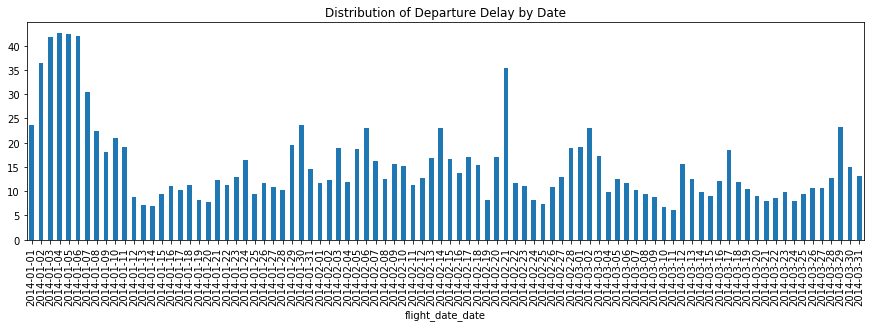

In [143]:
#Average Delay by Date
df_survey.groupby('flight_date_date')['Departure_Delay_in_Minutes'].mean().plot.bar(title='Distribution of Departure Delay by Date',figsize=(15,4))

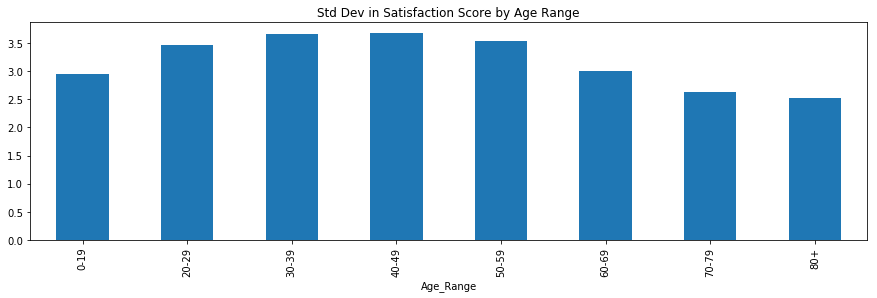

In [151]:
#Std Dev of Satisfaction Score by Age Group
df_survey.groupby('Age_Range')['Satisfaction'].std().plot.bar(title='Std Dev in Satisfaction Score by Age Range',figsize=(15,4))

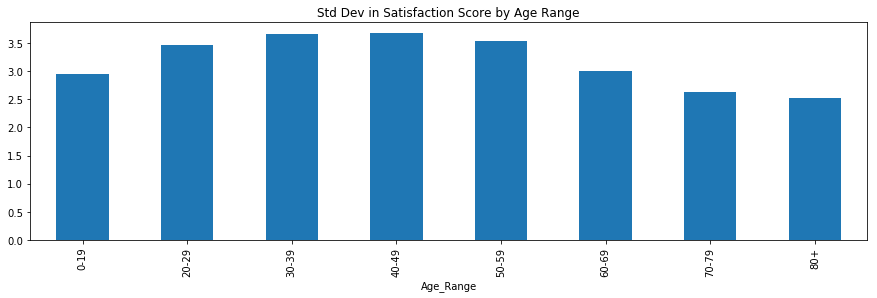

In [174]:
#Average of Satifaction Score by Age Group
df_survey.groupby('Age_Range')['Satisfaction'].mean().plot.bar(title='Std Dev in Satisfaction Score by Age Range',figsize=(15,4))

In [180]:
df_survey['Route']=df_survey['Orgin_City'] + " -> " + df_survey['Destination_City']
df_survey.head()

,Satisfaction,Airline_Status,Age,Age_Range,Gender,Price_Sensitivity,Year_of_First_Flight,No_of_Flights_p_a_,No_of_Flights_p_a__grouped,%_of_Flight_with_other_Airlines,...,Arrival_Delay_in_Minutes,Flight_cancelled,Flight_time_in_minutes,Flight_Distance,Arrival_Delay_greater_5_Mins,flight_date_mdy,flight_date_date,flight_date_month,flight_date_day,Route
0,4.5,Blue,31,30-39,Male,1,2007,28,21 to 30,7,...,3.0,No,134.0,821,no,2014-03-18,2014-03-18,3,18,"Madison, WI -> Dallas/Fort Worth, TX"
1,4.0,Blue,56,50-59,Male,2,2006,41,41 to 50,3,...,5.0,No,120.0,821,no,2014-01-11,2014-01-11,1,11,"Madison, WI -> Dallas/Fort Worth, TX"
2,2.5,Blue,21,20-29,Female,2,2006,8,1 to 10,7,...,14.0,No,122.0,853,yes,2014-01-25,2014-01-25,1,25,"Milwaukee, WI -> Dallas/Fort Worth, TX"
3,4.0,Blue,43,40-49,Male,1,2007,9,1 to 10,9,...,39.0,No,141.0,821,yes,2014-02-20,2014-02-20,2,20,"Madison, WI -> Dallas/Fort Worth, TX"
4,5.0,Silver,49,40-49,Male,1,2006,14,11 to 20,10,...,0.0,No,144.0,853,no,2014-02-25,2014-02-25,2,25,"Milwaukee, WI -> Dallas/Fort Worth, TX"


In [181]:
#Most Used Route
routes=list(df_survey['Route'])
print("Most Busy Route: %s" % statistics.mode(routes))


Most Busy Route: Los Angeles, CA -> San Francisco, CA


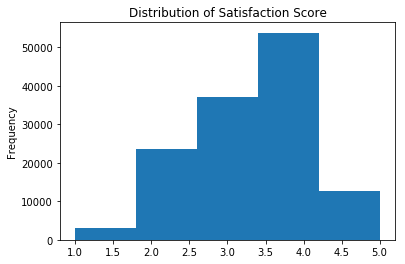

In [185]:
#Histogram of Satisfaction Score
df_survey['Satisfaction'].plot.hist(bins=5,title="Distribution of Satisfaction Score")
plt.show()

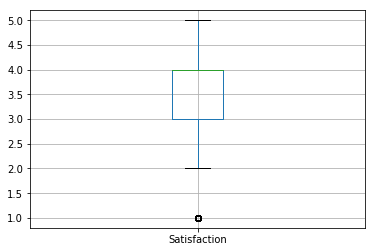

In [196]:
#Box plot to highlight outliers
box=df_survey.boxplot(column=["Satisfaction"])
plt.show()

In [201]:
q75,q25=np.percentile(satifaction,[75,25])
iqr=q75-q25
print ('Proportion of values as outlier: %f percent'%(
(len(df_survey) - len([x for x in satifaction if q75+(1.5*iqr)>=x>= q25-(1.5*iqr)]))*100/float(len(df_survey))
))

Proportion of values as outlier: 2.308895 percent


In [211]:
mean_with_outliers=np.mean(satifaction)
mean_without_outliers=np.mean([x for x in satifaction if q75 + (1.5*iqr) >=x>=q25 -(1.5*iqr)])
print("Mean with Outliers:%f"%mean_with_outliers)
print("Mean without Outliers:%f"%mean_without_outliers)

Mean with Outliers:3.379424
Mean without Outliers:3.435661


<H2> Correlation </H2>

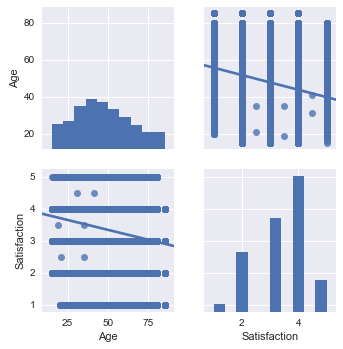

In [214]:
#Correlation of Age and Satifaction Score
seaborn.pairplot(df_survey, vars=["Age","Satisfaction"],kind='reg')
plt.show()

In [216]:
#Calculate Correlation between Age and Score
pd.set_option('display.width',100)
pd.set_option('precision',3)
correlations=df_survey[["Age","Satisfaction"]].corr(method='pearson')
print(correlations)

                Age  Satisfaction
Age           1.000        -0.222
Satisfaction -0.222         1.000


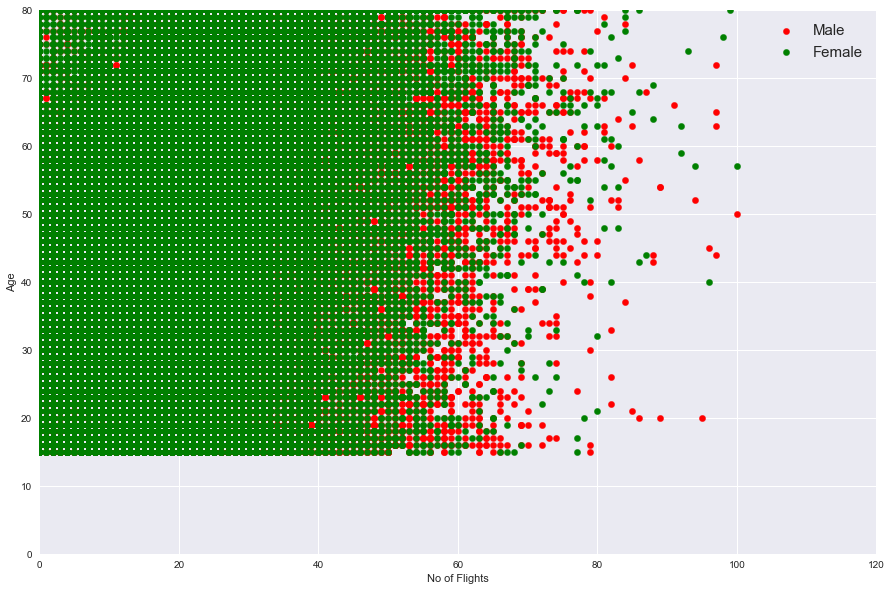

In [236]:
#Who is frequent flyer Male or Female
plt.figure(figsize=(15,10))
ax = plt.subplot()
ax.scatter(df_survey[df_survey['Gender']=='Male']['No_of_Flights_p_a_'],df_survey[df_survey['Gender']=='Male']['Age'], c='red',s=40)
ax.scatter(df_survey[df_survey['Gender']=='Female']['No_of_Flights_p_a_'],df_survey[df_survey['Gender']=='Female']['Age'], c='green',s=40)
#ax.scatter(df_survey[df_survey['Departure_Delay_in_Minutes']<15]['Age'],df_survey[df_survey['Departure_Delay_in_Minutes']<15]['Satisfaction'], c='green',s=40)

#ax.scatter(df_survey[df_survey['Flight_cancelled']=='No']['Age'],df_survey[df_survey['Flight_cancelled']=='No']['Satisfaction'], c='red',s=40)
#ax.scatter(df[df['Survived']==0]['Age'],df[df['Survived']==0]['Fare'], c='red',s=40)
ax.set_xlabel('No of Flights')
ax.set_ylabel('Age')
ax.set_xlim([0,120])
ax.set_ylim([0,80])
ax.legend(('Male','Female'),scatterpoints=1,loc='upper right',fontsize=15,)

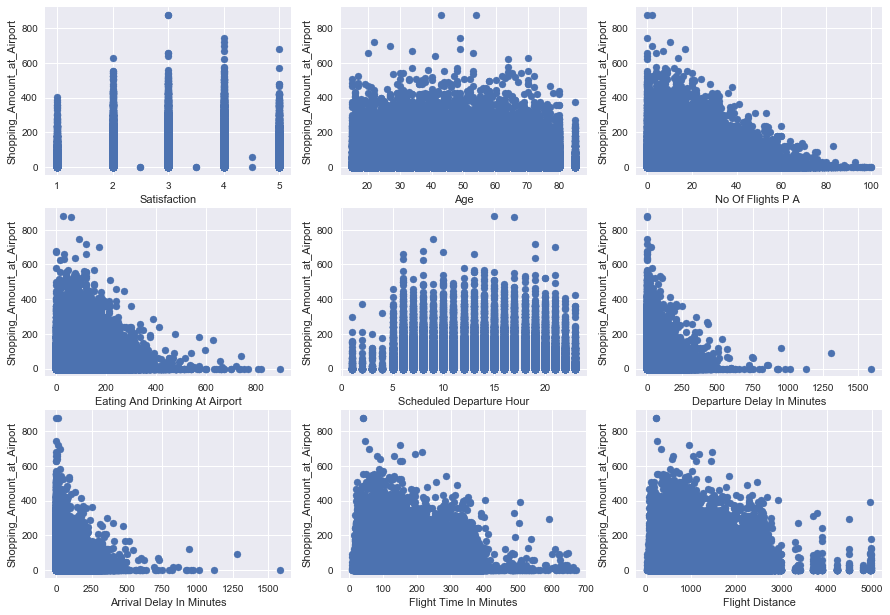

In [247]:

#Correlation of Shopping at Airport with other variables
data=df_survey[['Satisfaction','Age','No_of_Flights_p_a_','Eating_and_Drinking_at_Airport','Scheduled_Departure_Hour','Departure_Delay_in_Minutes',
                'Arrival_Delay_in_Minutes','Flight_time_in_minutes','Flight_Distance','Shopping_Amount_at_Airport']]
plt.figure(figsize=(15,10.5))
plot_count = 1
for feature in list(data.columns)[:-1]:
        plt.subplot(3,3,plot_count)
        plt.scatter(data[feature], data['Shopping_Amount_at_Airport'])
        plt.xlabel(feature.replace('_',' ').title())
        plt.ylabel('Shopping_Amount_at_Airport')
        plot_count+=1
plt.show()


<BR>Frequent Flyers shops less </BR>
<BR>Who eat and drink more shops less</BR>
<BR>Long flights means less shopping</BR>
<BR>Delay means less shopping</BR>
<BR>Less shopping means less Satisfied</BR>

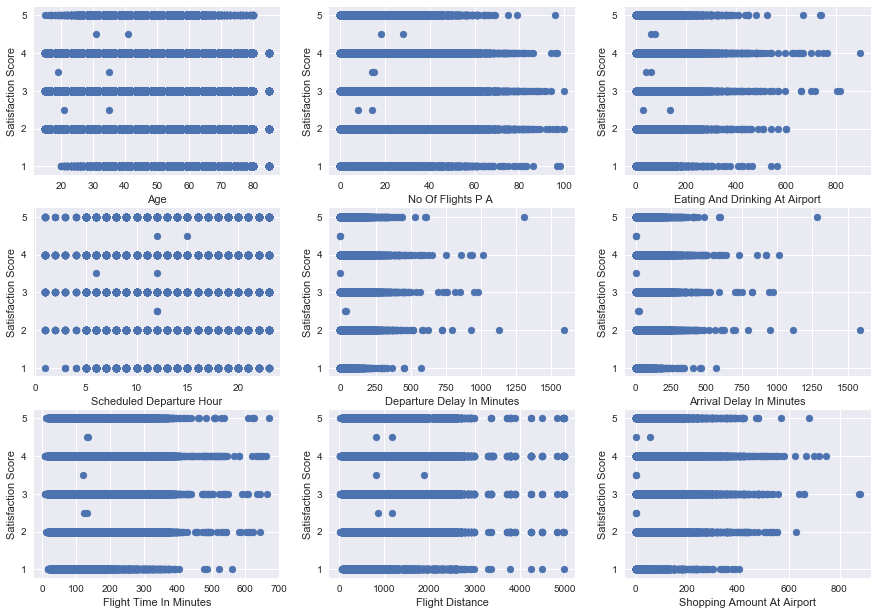

In [248]:

#Correlation of Satisfaction Score at Airport with other variables for Male and Female Both
data=df_survey[['Age','No_of_Flights_p_a_','Eating_and_Drinking_at_Airport','Scheduled_Departure_Hour','Departure_Delay_in_Minutes',
                'Arrival_Delay_in_Minutes','Flight_time_in_minutes','Flight_Distance','Shopping_Amount_at_Airport','Satisfaction']]
plt.figure(figsize=(15,10.5))
plot_count = 1
for feature in list(data.columns)[:-1]:
        plt.subplot(3,3,plot_count)
        plt.scatter(data[feature], data['Satisfaction'])
        plt.xlabel(feature.replace('_',' ').title())
        plt.ylabel('Satisfaction Score')
        plot_count+=1
plt.show()

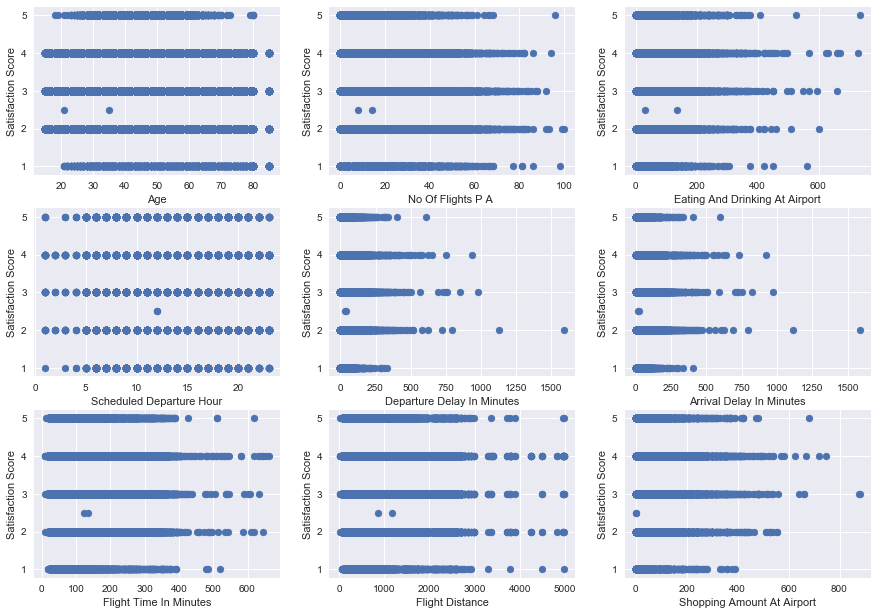

In [274]:

#Correlation of Satisfaction Score at Airport with other variables for Females
data=df_survey[df_survey['Gender']=='Female'][['Age','No_of_Flights_p_a_','Eating_and_Drinking_at_Airport','Scheduled_Departure_Hour','Departure_Delay_in_Minutes','Arrival_Delay_in_Minutes','Flight_time_in_minutes','Flight_Distance','Shopping_Amount_at_Airport','Satisfaction']]

plt.figure(figsize=(15,10.5))
plot_count = 1
for feature in list(data.columns)[:-1]:
        plt.subplot(3,3,plot_count)
        plt.scatter(data[feature], data['Satisfaction'])
        plt.xlabel(feature.replace('_',' ').title())
        plt.ylabel('Satisfaction Score')
        plot_count+=1
plt.show()



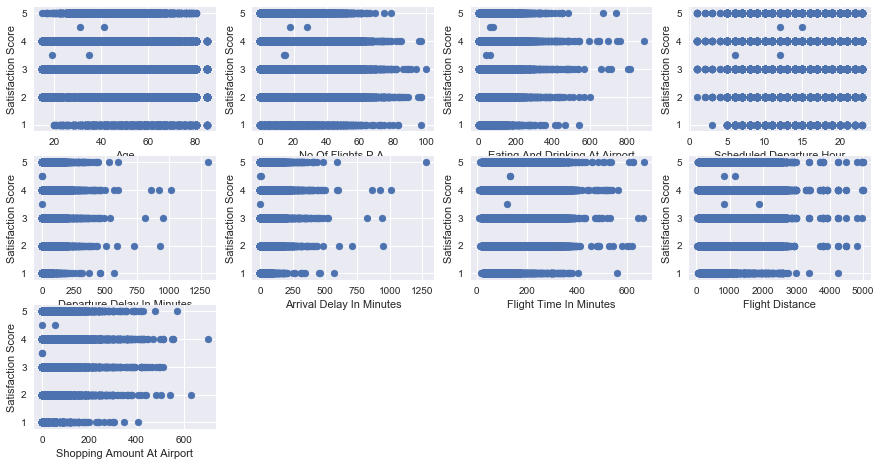

In [280]:
#Correlation of Satisfaction Score at Airport with other variables for Males
data=df_survey[df_survey['Gender']=='Male'][['Age','No_of_Flights_p_a_','Eating_and_Drinking_at_Airport','Scheduled_Departure_Hour','Departure_Delay_in_Minutes','Arrival_Delay_in_Minutes','Flight_time_in_minutes','Flight_Distance','Shopping_Amount_at_Airport','Satisfaction']]

plt.figure(figsize=(15,10.5))
plot_count = 1
for feature in list(data.columns)[:-1]:
        plt.subplot(4,4,plot_count)
        plt.scatter(data[feature], data['Satisfaction'])
        plt.xlabel(feature.replace('_',' ').title())
        plt.ylabel('Satisfaction Score')
        plot_count+=1
plt.show()

ValueError: max must be larger than min in range parameter.

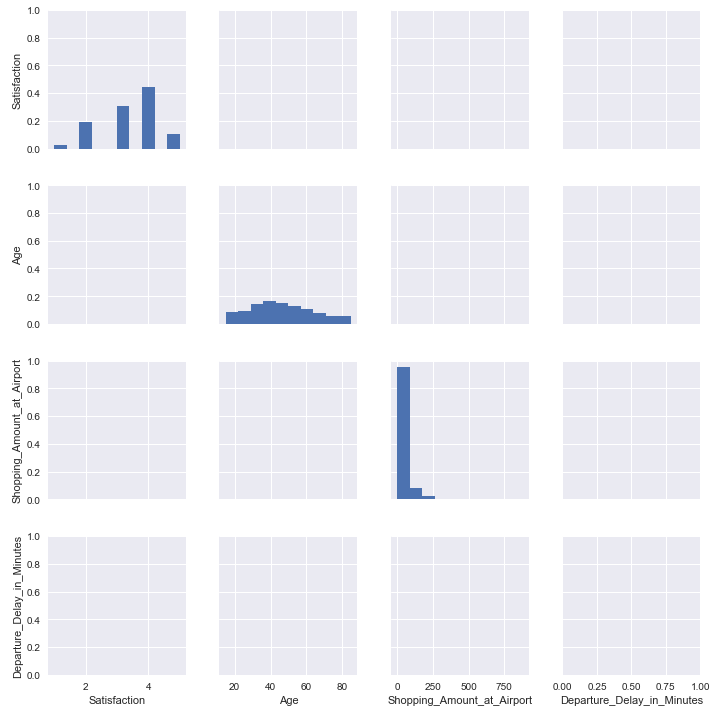

In [283]:
#Correlation plots of multiple variables
data=df_survey[['Satisfaction','Age','Shopping_Amount_at_Airport']]
data_ = data[(data.T != 0).any()]
seaborn.pairplot(data_, vars=data.columns, kind='reg')
plt.show()

In [286]:
data=df_survey[['Satisfaction','Age','Shopping_Amount_at_Airport','Departure_Delay_in_Minutes']]
pd.set_option('display.width', 200)
pd.set_option('precision', 5)
correlations = data.corr(method='pearson')
print(correlations)

                            Satisfaction      Age  Shopping_Amount_at_Airport  Departure_Delay_in_Minutes
Satisfaction                     1.00000 -0.22183                     0.01753                    -0.07296
Age                             -0.22183  1.00000                    -0.01083                     0.00085
Shopping_Amount_at_Airport       0.01753 -0.01083                     1.00000                    -0.00122
Departure_Delay_in_Minutes      -0.07296  0.00085                    -0.00122                     1.00000
